# March 2022 - Linear Regression

## 1. Import Libraries and Data
## 2. Data Cleaning
## 3. Check for extreme values
## 4. Data Prep for Regression Analysis
## 5. Regression Analysis
## 6. Check Model Performance with statistics
## 7. Conclusions

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Allow graphs created to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 19)

### 2. Data Cleaning

In [6]:
# Check for missing values

df.isnull().sum()

sub_agency                   0
country                      0
age_level                    0
education_level              0
pay_grade               631944
years_grouping               0
occupation                   0
occupation_category          0
pay_plan                     0
stem                         0
supervisor_status            0
full_time                    0
work_status                  0
date                         0
salary                  301029
years_of_service             0
occupation_family      1113697
agency                       0
state                        0
dtype: int64

In [7]:
# I am looking at years of service and salary, so I need to handle the missing values in salary column

In [8]:
#create data frame with missing values to see examples of what is missing
df_nan = df[df['salary'].isnull() == True]

In [9]:
df_nan

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,supervisor_status,full_time,work_status,date,salary,years_of_service,occupation_family,agency,state
93,AIR FORCE INSPECTION AGENCY (FO),SUPPRESSED,60-64,BACHELORS,14.0,15 - 19,"GENERAL INSPECTION, INVESTIGATION, ENFORCEMENT...",Administrative,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,NaN,15.3,INVESTIGATION,DEPARTMENT OF THE AIR FORCE,SUPPRESSED (SEE DATA DEFINITIONS)
97,AIR FORCE INSPECTION AGENCY (FO),SUPPRESSED,60-64,MASTERS,15.0,10 - 14,"GENERAL INSPECTION, INVESTIGATION, ENFORCEMENT...",Administrative,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,NaN,13.2,INVESTIGATION,DEPARTMENT OF THE AIR FORCE,SUPPRESSED (SEE DATA DEFINITIONS)
100,AIR FORCE INSPECTION AGENCY (FO),SUPPRESSED,35-39,HIGH SCHOOL OR EQUIVALENCY,13.0,10 - 14,"GENERAL INSPECTION, INVESTIGATION, ENFORCEMENT...",Administrative,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,NaN,13.4,INVESTIGATION,DEPARTMENT OF THE AIR FORCE,SUPPRESSED (SEE DATA DEFINITIONS)
101,AIR FORCE INSPECTION AGENCY (FO),SUPPRESSED,65 or more,BACHELORS,14.0,10 - 14,"GENERAL INSPECTION, INVESTIGATION, ENFORCEMENT...",Administrative,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,NaN,12.6,INVESTIGATION,DEPARTMENT OF THE AIR FORCE,SUPPRESSED (SEE DATA DEFINITIONS)
102,AIR FORCE INSPECTION AGENCY (FO),SUPPRESSED,35-39,MASTERS,13.0,15 - 19,"GENERAL INSPECTION, INVESTIGATION, ENFORCEMENT...",Administrative,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,NaN,17.4,INVESTIGATION,DEPARTMENT OF THE AIR FORCE,SUPPRESSED (SEE DATA DEFINITIONS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155580,U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,United States,60-64,HIGH SCHOOL OR EQUIVALENCY,NaN,1 - 2,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...",0,UNSPECIFIED,Not Full time,Other Employees,March 2022,NaN,1.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,DISTRICT OF COLUMBIA
2155586,U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,United States,65 or more,POST-BACHELORS,NaN,1 - 2,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...",0,UNSPECIFIED,Not Full time,Other Employees,March 2022,NaN,2.1,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,DISTRICT OF COLUMBIA
2155587,U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,United States,65 or more,BACHELORS,NaN,1 - 2,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...",0,UNSPECIFIED,Not Full time,Other Employees,March 2022,NaN,1.8,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,DISTRICT OF COLUMBIA
2155588,U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,United States,50-54,BACHELORS,NaN,1 - 2,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...",0,UNSPECIFIED,Not Full time,Other Employees,March 2022,NaN,1.8,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",U.S. COMMISSION ON INTERNATIONAL RELIGIOUS FRE...,DISTRICT OF COLUMBIA


In [10]:
df_nan.sub_agency.value_counts(dropna = False)

CUSTOMS AND BORDER PROTECTION                                  59525
TRANSPORTATION SECURITY ADMINISTRATION                         54148
FEDERAL BUREAU OF INVESTIGATION                                32101
IMMIGRATION AND CUSTOMS ENFORCEMENT                            18294
BUREAU OF PRISONS/FEDERAL PRISON SYSTEM                        16665
                                                               ...  
US ARMY AFRICA/SOUTHERN EUROPEAN TASK FORCE (USAFRAF/SETAF)        1
OFFICE OF THE CHIEF FINANCIAL OFFICER                              1
FEDERAL HIGHWAY ADMINISTRATION                                     1
GREAT LAKES SAINT LAWRENCE SEAWAY DEVELOPMENT CORPORATION          1
THE WOMEN'S SUFFRAGE CENTENNIAL COMMISSION                         1
Name: sub_agency, Length: 332, dtype: int64

In [11]:
df_nan.full_time.value_counts(dropna = False)

Full time        291903
Not Full time      9121
Unspecified           5
Name: full_time, dtype: int64

In [12]:
#Missing values are a variety of items.  Since a salary can be dependent on full/part time
#I will get the mean of each variable in full_time and replace NaN in df with corresponding mean

In [13]:
salary_mean = df.groupby('full_time').agg({'salary': ['mean']})

In [14]:
salary_mean

,salary
,mean
full_time,
Full time,95713.128873
Not Full time,92309.141031
Unspecified,83802.888889


In [15]:
# fill NaN values in df with 0 to make it easy to replace
df['salary'] = df['salary'].fillna(0)

In [16]:
# replace values with mean salary

In [17]:
df['salary'] = np.where((df['salary'] == 0)
                           & (df['full_time'] == 'Full time'), #Identifies the case to apply to
                           ['95713.13'],      #This is the value that is inserted
                           df['salary'])      #This is the column that is affected

In [18]:
df['salary'] = np.where((df['salary'] == 0)
                           & (df['full_time'] == 'Not Full time'), #Identifies the case to apply to
                           ['92309.14'],      #This is the value that is inserted
                           df['salary'])      #This is the column that is affected

In [19]:
df['salary'] = np.where((df['salary'] == 0)
                           & (df['full_time'] == 'Unspecified'), #Identifies the case to apply to
                           ['83802.89'],      #This is the value that is inserted
                           df['salary'])      #This is the column that is affected

In [20]:
#double check df column for NaN or values that equal 0 to make sure nothing is missed

In [21]:
df.isnull().sum()

sub_agency                   0
country                      0
age_level                    0
education_level              0
pay_grade               631944
years_grouping               0
occupation                   0
occupation_category          0
pay_plan                     0
stem                         0
supervisor_status            0
full_time                    0
work_status                  0
date                         0
salary                       0
years_of_service             0
occupation_family      1113697
agency                       0
state                        0
dtype: int64

In [22]:
count = (df['salary'] == 0).sum()

In [23]:
count

0

### 3. Check for extreme values

/Users/bethanybreed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

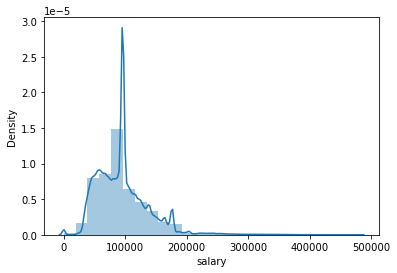

In [24]:
sns.distplot(df['salary'], bins=25) # Shows extreme values

In [25]:
#I will leave them for now, as this is expected, not many people will make the larger salaries which may be part of our conclusion

### 4. Data Prep for Regression Analysis

### I am looking at Years of Service and how it affects Salary based of Variable Relationships Script

## Hypothesis Years of Service affects Salary

In [26]:
type('years_of_service')

str

In [27]:
df = df.astype({"years_of_service": float, "salary": float})

In [28]:
type('years_of_service')

str

In [29]:
df.years_of_service.value_counts(dropna = False)

0.8     24194
0.3     23637
1.8     23147
2.8     22229
5.8     18971
        ...  
61.4        1
62.3        1
63.6        1
66.0        1
70.7        1
Name: years_of_service, Length: 642, dtype: int64

In [30]:
df.salary.value_counts(dropna = False)

95713.13     291903
176300.00     39673
138868.00     14039
164102.00     13435
36118.00       9660
              ...  
195231.00         1
179996.00         1
178698.00         1
183279.00         1
55631.00          1
Name: salary, Length: 121051, dtype: int64

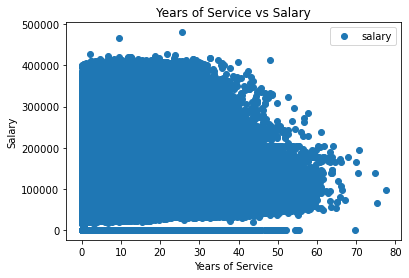

In [31]:
# Create a scatterplot using matplotlib to check how variables work together

df.plot(x = 'years_of_service', y='salary',style='o') 
plt.title('Years of Service vs Salary')  
plt.xlabel('Years of Service')  
plt.ylabel('Salary')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['years_of_service'].values.reshape(-1,1)
y = df['salary'].values.reshape(-1,1)

In [33]:
X

array([[18.8],
       [29.2],
       [12.5],
       ...,
       [ 4.5],
       [ 0.3],
       [ 0.2]])

In [34]:
y

array([[192500.],
       [187000.],
       [161786.],
       ...,
       [ 56661.],
       [ 55631.],
       [176894.]])

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [36]:
# Create a regression object.

regression = LinearRegression()

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

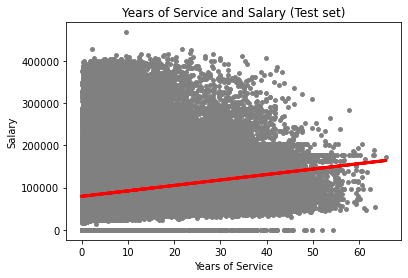

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years of Service and Salary (Test set)')
plot_test.xlabel('Years of Service')
plot_test.ylabel('Salary')
plot_test.show()

### The line shows a positive impact that years of service has on salary.  You can see that it is not a strong match though as you would expect the points to be more concentrated around the line.  You can see that 0 years of service still has a wide range of salaries and is not a clear indicator that you would have a high salary.  And on the far end you can see clearly that those over 50 don't have the highest salaries.  We can double check the statistics on this but it is clear that working longer years does not necessarily indicate a higher salary and there are other factors at play

### 6. Check Model Performance with statistics

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [41]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1288.09600112]]
Mean squared error:  1713677683.7290251
R2 score:  0.0881950824357901


In [42]:
y_predicted

array([[ 98640.86024453],
       [ 95935.85864217],
       [102247.52904768],
       ...,
       [ 83441.32743127],
       [ 80221.08742846],
       [ 87563.23463487]])

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(30)

,Actual,Predicted
0,95713.13,98640.860245
1,95713.13,95935.858642
2,82091.00,102247.529048
3,56474.00,84342.994632
4,153239.00,117447.061861
5,32570.00,79834.658628
6,140777.00,98383.241044
7,110697.00,96064.668242
8,84655.00,82153.231430
9,71272.00,99800.146646


# 7. Conclusions

### Overall this model was not the best.
### The slope shows that there was a positve correlation, but it is not strong at all as the slope is not at a sharper angle and many dots are very far away from it.
### The MSE is very large being 1,714,532,910.  We have a lot of values that are VERY far away from the regression line which is causing such a large number.  The higher this number the less accurate our model is.
### The R2 score is .087.  The closer this is to 0, the less of a good fit the model is.  We would hope to see a value closer to 1 to indicate a good model fit.

### With these results I would then look to see if there are other indicators of salary that indicate a better model so someone would know what to do in order to look for a higher salary (better job, education, leadership role, etc). As the number of years you work does not clearly indicate a higher salary. 

### There is slight data issues with the salary.  I did not want to exclude the values, but imputing the mean might not have been the most accurate since there are so many factors that lead to salary vs just full time or part time.  As I did not exclude any values (even some of the extreme values) this model would be an accurate representation of the relationship between years of service and salary.